In [ ]:
%pip install torch matplotlib numpy scipy tensorflow tensorflow-probability tf-keras


In [22]:
import warnings
warnings.filterwarnings('ignore', message='urllib3 v2 only supports OpenSSL')
warnings.filterwarnings('ignore', category=DeprecationWarning)


# Naive Bayes Classifier

## 1. Introduction

### 1.1. Problem Statement

In real-world scenarios, particularly in Computer Science and Machine Learning, we often encounter the need to classify data points into predefined categories based on their features. Probabilistic classification methods provide a mathematical framework to handle uncertainty inherent in these problems. Among them, the **Naive Bayes classifier** stands out due to its simplicity, interpretability, and efficiency [1][3].

The core idea behind Naive Bayes is using probability theory, particularly **Bayes' theorem**, to calculate the probability of each class given the observed features, and then selecting the most probable class.

### 1.2. Applications in Computer Science

Naive Bayes has been successfully applied to numerous practical problems in computer science, including:

- **Spam Email Filtering:** Classifying emails as "spam" or "not spam" based on the occurrence of certain words [3].
- **Document Categorization:** Classifying text documents (e.g., news articles, academic papers) into various topics.
- **Sentiment Analysis:** Determining sentiment (positive, negative, neutral) from product reviews or social media data.
- **Optical Character Recognition (OCR):** Identifying handwritten characters from image data.
- **Medical Diagnosis:** Classifying patients as healthy or having a disease based on symptoms or medical test results.

### 1.3. Computer Science Problems Solved by Naive Bayes

Naive Bayes has notably solved or significantly simplified various computer science challenges, such as:

- **Text Classification (NLP):**
  - Predicting the topic or sentiment of texts.
- **Image Classification:**
  - Recognizing digits or letters from handwritten documents (such as the famous MNIST dataset).
- **Recommender Systems:**
  - Predicting user preferences based on their historical interactions.

### 1.4. Mathematical Foundation

Naive Bayes leverages two critical mathematical concepts:

- **Bayes' Theorem**, which allows the computation of conditional probabilities [1][2]:

$$
P(y|\mathbf{x}) = \frac{P(\mathbf{x}|y)P(y)}{P(\mathbf{x})}
$$

- The assumption of **conditional independence** among features, given a class $y$, which significantly simplifies calculations [1][3]:

$$
P(x_1, x_2, \ldots, x_d|y) = \prod_{i=1}^{d} P(x_i|y)
$$

These assumptions enable the Naive Bayes classifier to efficiently estimate class probabilities even with limited training data, making it especially powerful for high-dimensional data.

## 2. Theoretical Foundations & Implementations

This section presents the core mathematical formulas underlying the Naive Bayes classifier, organized from fundamental probability concepts to practical implementations. Each formula includes:
- **Detailed Explanation:** Intuitive understanding of the concept
- **Detailed Derivation:** Mathematical proof and reasoning
- **Concrete Example:** Real-world application with numerical calculations
- **Python Implementation:** Verification through code

### 2.1. The Probabilistic Model for Classification

In a classification task, given an input data example (denoted by the vector $\mathbf{x}$), our goal is to assign it to one of the predefined classes (labels) $y$. The mathematical representation for classification, using probability theory, is to find the most likely label $y$ [1], given the observed features $\mathbf{x}$:

#### Formula 22.9.1:

$$
\hat{y} = \operatorname*{argmax}_y P(y \mid \mathbf{x})
$$

### Derivation & Explanation:

- To classify a data point, we want to maximize the conditional probability $P(y \mid \mathbf{x})$, which represents the probability of a class $y$ given features $\mathbf{x}$.
- According to Bayes' theorem, this conditional probability can be rewritten as:

$$
P(y \mid \mathbf{x}) = \frac{P(\mathbf{x} \mid y)P(y)}{P(\mathbf{x})}
$$

- Hence, the optimal class can be found by maximizing:

$$
\hat{y} = \operatorname*{argmax}_y \frac{P(\mathbf{x} \mid y)P(y)}{P(\mathbf{x})}
$$

- Since $P(\mathbf{x})$ (the denominator) is the same for every class, it does not affect the maximization. Therefore, we simplify the formula by ignoring this denominator, yielding:

$$
\hat{y} = \operatorname*{argmax}_y P(\mathbf{x} \mid y)P(y)
$$

This simplification significantly reduces the computational complexity and serves as the basis for the Naive Bayes classifier.

### Concrete Example (detailed calculation):

Suppose we have an email, and we want to classify it as "Spam" (S) or "Not Spam" (NS) based on a single keyword "lottery". We have:

- $P(S) = 0.2$, $P(NS) = 0.8$
- The word "lottery" occurs with:
  - $P(\text{"lottery"}|S) = 0.7$
  - $P(\text{"lottery"}|NS) = 0.05$

Using the simplified formula:

$$
\hat{y} = \operatorname*{argmax}_y P(y)P(\mathbf{x}|y)
$$

We compute probabilities for both classes clearly:

- For class Spam (S):

$$
P(S)P(\text{"lottery"}|S) = 0.2 \times 0.7 = 0.14
$$

- For class Not Spam (NS):

$$
P(NS)P(\text{"lottery"}|NS) = 0.8 \times 0.05 = 0.04
$$

Thus, clearly, we see:

$$
0.14 > 0.04 \quad \Rightarrow \quad \hat{y} = \text{Spam}
$$

Hence, the email is classified as Spam.

### Python Verification:

In [23]:
import torch
import torch.nn.functional as F

P_y_torch = torch.tensor([0.2, 0.8])
P_x_given_y_torch = torch.tensor([0.7, 0.05])

posteriors_torch = P_y_torch * P_x_given_y_torch

log_posteriors = torch.log(posteriors_torch)
normalized_posteriors = F.softmax(log_posteriors, dim=0)

predicted_idx = torch.argmax(posteriors_torch)
classes = ['Spam', 'Not Spam']

print("\n" + "="*60)
print("PyTorch Implementation")
print("="*60)
print(f"Unnormalized posteriors: {posteriors_torch}")
print(f"Normalized posteriors: {normalized_posteriors}")
print(f"Predicted: {classes[predicted_idx]}")
print("="*60)


PyTorch Implementation
Unnormalized posteriors: tensor([0.1400, 0.0400])
Normalized posteriors: tensor([0.7778, 0.2222])
Predicted: Spam


In [24]:
import tensorflow as tf

P_y_tf = tf.constant([0.2, 0.8])
P_x_given_y_tf = tf.constant([0.7, 0.05])

posteriors_tf = P_y_tf * P_x_given_y_tf

log_posteriors = tf.math.log(posteriors_tf)
normalized_posteriors = tf.nn.softmax(log_posteriors)

predicted_idx_tf = tf.argmax(posteriors_tf)
classes = ['Spam', 'Not Spam']

print("\n" + "="*60)
print("TensorFlow Implementation")
print("="*60)
print(f"Unnormalized posteriors: {posteriors_tf.numpy()}")
print(f"Normalized posteriors: {normalized_posteriors.numpy()}")
print(f"Predicted: {classes[predicted_idx_tf]}")
print("="*60)


TensorFlow Implementation
Unnormalized posteriors: [0.14 0.04]
Normalized posteriors: [0.77777773 0.22222224]
Predicted: Spam


In [25]:
import numpy as np

P_y_np = np.array([0.2, 0.8])
P_x_given_y_np = np.array([0.7, 0.05])

posteriors_np = P_y_np * P_x_given_y_np

posteriors_sum = np.sum(posteriors_np)
normalized_posteriors = posteriors_np / posteriors_sum

predicted_idx_np = np.argmax(posteriors_np)
classes = ['Spam', 'Not Spam']

print("\n" + "="*60)
print("NumPy Implementation")
print("="*60)
print(f"Unnormalized posteriors: {posteriors_np}")
print(f"Normalized posteriors: {normalized_posteriors}")
print(f"Predicted: {classes[int(predicted_idx_np)]}")
print("="*60)


NumPy Implementation
Unnormalized posteriors: [0.14 0.04]
Normalized posteriors: [0.77777778 0.22222222]
Predicted: Spam


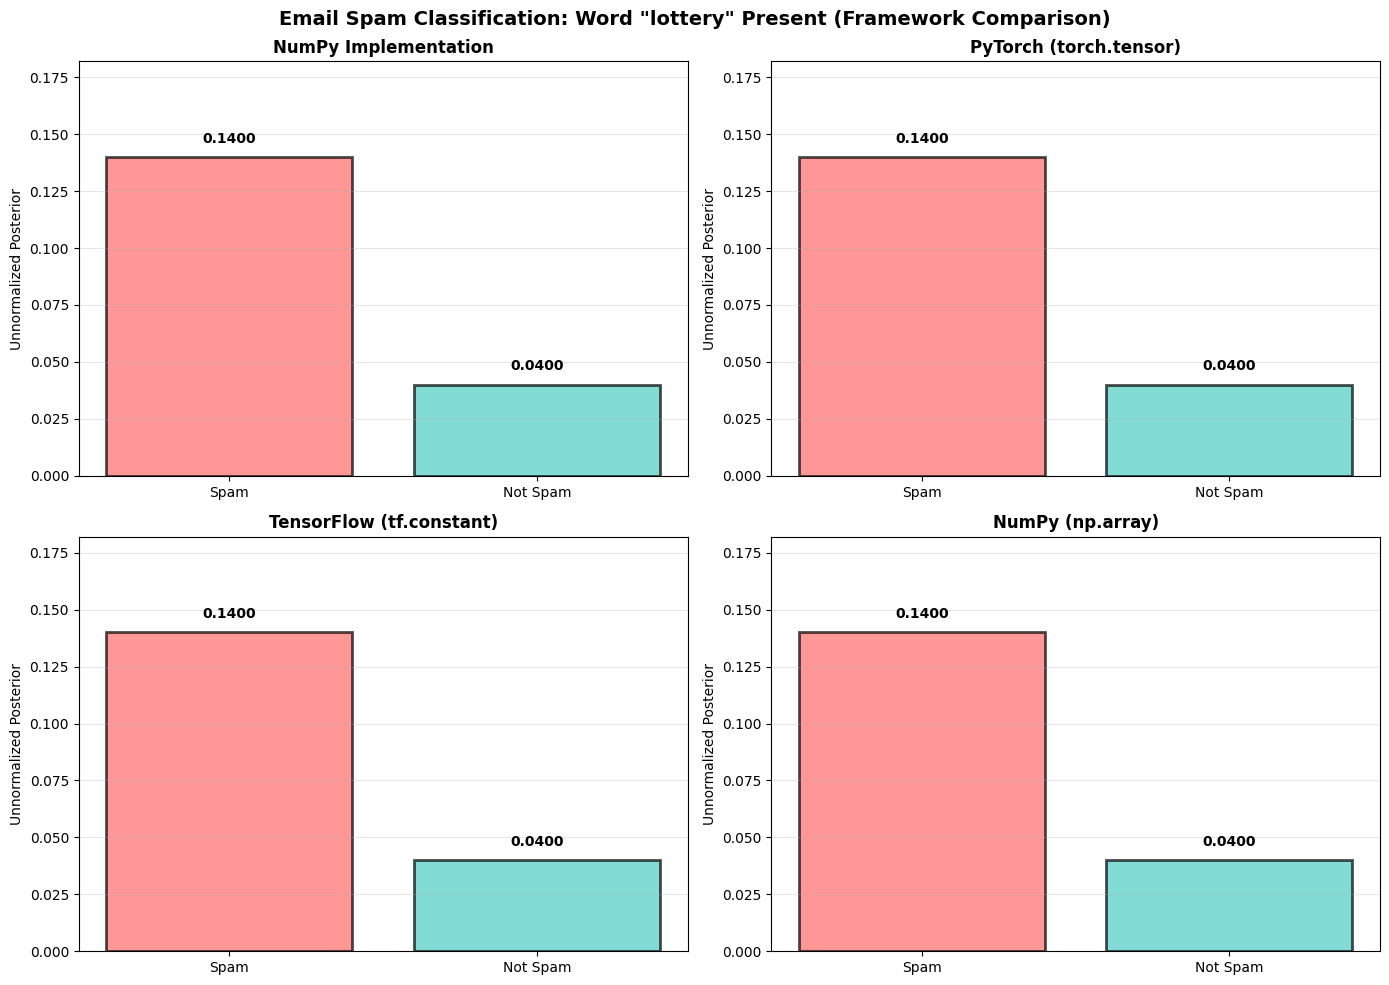


Framework Comparison Summary
All frameworks produce identical results:
  Spam: 0.1400
  Not Spam: 0.0400
  Prediction: Spam


In [26]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

# Common data
P_y_data = [0.2, 0.8]
P_x_given_y_data = [0.7, 0.05]
classes = ['Spam', 'Not Spam']

# NumPy
P_y_np = np.array(P_y_data)
P_x_given_y_np = np.array(P_x_given_y_data)
posteriors_np = P_y_np * P_x_given_y_np

# PyTorch (already computed in previous cell, recompute for visualization)
P_y_torch = torch.tensor(P_y_data)
P_x_given_y_torch = torch.tensor(P_x_given_y_data)
posteriors_torch = P_y_torch * P_x_given_y_torch

# TensorFlow (already computed in previous cell, recompute for visualization)
P_y_tf = tf.constant(P_y_data)
P_x_given_y_tf = tf.constant(P_x_given_y_data)
posteriors_tf = P_y_tf * P_x_given_y_tf

# Create 2x2 visualization comparing all frameworks
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#FF6B6B', '#4ECDC4']

# NumPy
axes[0,0].bar(classes, posteriors_np, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,0].set_title('NumPy Implementation', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Unnormalized Posterior', fontsize=10)
axes[0,0].set_ylim([0, max(posteriors_np) * 1.3])
for i, v in enumerate(posteriors_np):
    axes[0,0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,0].grid(True, alpha=0.3, axis='y')

# PyTorch
axes[0,1].bar(classes, posteriors_torch.numpy(), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,1].set_title('PyTorch (torch.tensor)', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Unnormalized Posterior', fontsize=10)
axes[0,1].set_ylim([0, max(posteriors_torch.numpy()) * 1.3])
for i, v in enumerate(posteriors_torch.numpy()):
    axes[0,1].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,1].grid(True, alpha=0.3, axis='y')

# TensorFlow
axes[1,0].bar(classes, posteriors_tf.numpy(), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,0].set_title('TensorFlow (tf.constant)', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Unnormalized Posterior', fontsize=10)
axes[1,0].set_ylim([0, max(posteriors_tf.numpy()) * 1.3])
for i, v in enumerate(posteriors_tf.numpy()):
    axes[1,0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1,0].grid(True, alpha=0.3, axis='y')

# NumPy (duplicate for consistent 2x2 layout)
axes[1,1].bar(classes, posteriors_np, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,1].set_title('NumPy (np.array)', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Unnormalized Posterior', fontsize=10)
axes[1,1].set_ylim([0, max(posteriors_np) * 1.3])
for i, v in enumerate(posteriors_np):
    axes[1,1].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1,1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Email Spam Classification: Word "lottery" Present (Framework Comparison)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"Framework Comparison Summary")
print(f"{'='*70}")
print(f"All frameworks produce identical results:")
print(f"  Spam: {posteriors_np[0]:.4f}")
print(f"  Not Spam: {posteriors_np[1]:.4f}")
print(f"  Prediction: {classes[np.argmax(posteriors_np)]}")
print(f"{'='*70}")


In [27]:
import numpy as np

P_y = {'Spam': 0.2, 'Not Spam': 0.8}
P_x_given_y = {'Spam': 0.7, 'Not Spam': 0.05}

posteriors_np = {y: P_y[y] * P_x_given_y[y] for y in P_y}
predicted_class = max(posteriors_np, key=posteriors_np.get)

print("="*60)
print("Naive Bayes - Email Spam Example")
print("="*60)
print(f"Feature: Word 'lottery' in email")
print(f"\nPriors:")
print(f"  P(Spam) = {P_y['Spam']}")
print(f"  P(Not Spam) = {P_y['Not Spam']}")
print(f"\nLikelihoods:")
print(f"  P('lottery'|Spam) = {P_x_given_y['Spam']}")
print(f"  P('lottery'|Not Spam) = {P_x_given_y['Not Spam']}")
print(f"\nPosterior (unnormalized):")
for cls, prob in posteriors_np.items():
    print(f"  {cls}: {prob:.4f}")
print(f"\nPredicted: {predicted_class}")
print("="*60)

Naive Bayes - Email Spam Example
Feature: Word 'lottery' in email

Priors:
  P(Spam) = 0.2
  P(Not Spam) = 0.8

Likelihoods:
  P('lottery'|Spam) = 0.7
  P('lottery'|Not Spam) = 0.05

Posterior (unnormalized):
  Spam: 0.1400
  Not Spam: 0.0400

Predicted: Spam


### 2.2. Bayes' Theorem for Classification

#### Formula 22.9.2: Bayes' Theorem

**Original Formula:**

$$
P(y|\mathbf{x}) = \frac{P(\mathbf{x}|y)P(y)}{P(\mathbf{x})}
$$

### Detailed Derivation:

Starting from the basic definition of conditional probability [2], we have explicitly:

- Conditional probability of event $y$ given event $\mathbf{x}$:

$$
P(y|\mathbf{x}) = \frac{P(\mathbf{x}, y)}{P(\mathbf{x})}
$$

- Similarly, the conditional probability of event $\mathbf{x}$ given $y$ is:

$$
P(\mathbf{x}|y) = \frac{P(\mathbf{x}, y)}{P(y)}
$$

- From this second equation, we clearly have:

$$
P(\mathbf{x}, y) = P(\mathbf{x}|y)P(y)
$$

- Substitute this expression back into the first equation explicitly, obtaining Bayes' theorem:

$$
P(y|\mathbf{x}) = \frac{P(\mathbf{x}|y)P(y)}{P(\mathbf{x})}
$$

This formula has now been explicitly derived from the basic definitions of conditional probabilities.

### Concrete Example (detailed calculation):

Suppose we have a medical test for a disease. The probabilities are given as follows:

- Probability a patient has the disease ($D$): $P(D) = 0.01$
- Probability the test is positive if patient has the disease: $P(\text{Positive}|D) = 0.99$
- Probability the test is positive if patient does **not** have the disease: $P(\text{Positive}|\neg D) = 0.05$

Let's compute clearly the probability a patient actually has the disease, given the test is positive:

**Step 1: Compute $P(\text{Positive})$ explicitly using law of total probability:**

$$
P(\text{Positive}) = P(\text{Positive}|D)P(D) + P(\text{Positive}|\neg D)P(\neg D)
$$

Substitute numbers clearly:

$$
= (0.99)(0.01) + (0.05)(0.99) = 0.0099 + 0.0495 = 0.0594
$$

**Step 2: Apply Bayes' theorem explicitly:**

$$
P(D|\text{Positive}) = \frac{P(\text{Positive}|D)P(D)}{P(\text{Positive})} = \frac{(0.99)(0.01)}{0.0594} = \frac{0.0099}{0.0594} \approx 0.1667
$$

Thus, explicitly, the probability the patient has the disease given a positive test is approximately 16.67%.

### Python Implementation:


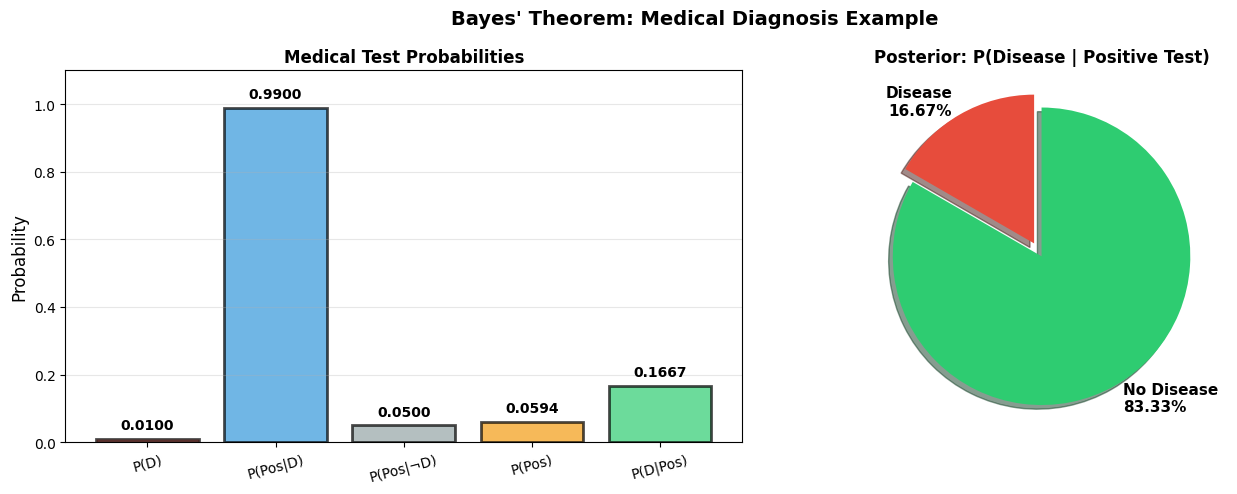


Bayes' Theorem - Medical Test Summary
Prior: P(Disease) = 0.01
Likelihood: P(Positive | Disease) = 0.99
Likelihood: P(Positive | No Disease) = 0.05

Marginal: P(Positive) = 0.0594
Posterior: P(Disease | Positive) = 0.1667 (16.67%)


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Recalculate for visualization
P_D = 0.01
P_Pos_given_D = 0.99
P_Pos_given_not_D = 0.05

P_Pos = P_Pos_given_D * P_D + P_Pos_given_not_D * (1 - P_D)
P_D_given_Pos = (P_Pos_given_D * P_D) / P_Pos
P_not_D_given_Pos = 1 - P_D_given_Pos

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart showing all probabilities
categories = ['P(D)', 'P(Pos|D)', 'P(Pos|¬D)', 'P(Pos)', 'P(D|Pos)']
values = [P_D, P_Pos_given_D, P_Pos_given_not_D, P_Pos, P_D_given_Pos]
colors_bar = ['#E74C3C', '#3498DB', '#95A5A6', '#F39C12', '#2ECC71']

axes[0].bar(categories, values, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Probability', fontsize=12)
axes[0].set_title('Medical Test Probabilities', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 1.1])
for i, v in enumerate(values):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=15)

# Pie chart showing posterior distribution
labels = [f'Disease\n{P_D_given_Pos:.2%}', f'No Disease\n{P_not_D_given_Pos:.2%}']
sizes = [P_D_given_Pos, P_not_D_given_Pos]
colors_pie = ['#E74C3C', '#2ECC71']
explode = (0.1, 0)

axes[1].pie(sizes, explode=explode, labels=labels, colors=colors_pie,
           shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Posterior: P(Disease | Positive Test)', fontsize=12, fontweight='bold')

plt.suptitle('Bayes\' Theorem: Medical Diagnosis Example', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"Bayes' Theorem - Medical Test Summary")
print(f"{'='*70}")
print(f"Prior: P(Disease) = {P_D}")
print(f"Likelihood: P(Positive | Disease) = {P_Pos_given_D}")
print(f"Likelihood: P(Positive | No Disease) = {P_Pos_given_not_D}")
print(f"\nMarginal: P(Positive) = {P_Pos:.4f}")
print(f"Posterior: P(Disease | Positive) = {P_D_given_Pos:.4f} ({P_D_given_Pos:.2%})")
print(f"{'='*70}")


In [29]:
P_D = 0.01
P_Pos_given_D = 0.99
P_Pos_given_not_D = 0.05

P_Pos = P_Pos_given_D * P_D + P_Pos_given_not_D * (1 - P_D)
P_D_given_Pos = (P_Pos_given_D * P_D) / P_Pos

print("P(Positive) =", P_Pos)
print("P(Disease | Positive) =", P_D_given_Pos)


P(Positive) = 0.0594
P(Disease | Positive) = 0.16666666666666669


**Python implementation clearly confirms our manual calculation.**

### Interpretation of this Formula:

- Bayes' theorem is a powerful tool for "updating" the probability estimate of an event based on new observed data.
- It is foundational in many machine learning algorithms and probabilistic modeling techniques, notably the Naive Bayes classifier, Bayesian networks, and Bayesian inference.


### 2.3. Conditional Probability Expansion (Chain Rule)

#### Formula 22.9.3: Chain Rule

**Original Formula:**

$$
P(\mathbf{x}|y) = P(x_1|y) \cdot P(x_2|x_1, y) \cdot P(x_3|x_2, x_1, y) \ldots P(x_d|x_{d-1}, \ldots, x_1, y)
$$

### Detailed Derivation:

We will clearly derive this formula using the **chain rule of conditional probabilities**, which states that:

$$
P(A, B) = P(A) \cdot P(B|A)
$$

Generalizing this for multiple variables, we have explicitly:

$$
P(x_1, x_2, x_3, \ldots, x_d|y) = P(x_1|y) \cdot P(x_2|x_1, y) \cdot P(x_3|x_2, x_1, y) \ldots P(x_d|x_{d-1}, \ldots, x_1, y)
$$

This shows clearly how the probability of a complex event (a sequence of variables) can be broken down sequentially into simpler conditional probabilities.

### Concrete Example (detailed calculation):

Suppose we have the class "Rainy day" (denoted by $y$). We want to find the probability of three consecutive events happening given that it's a rainy day:

- $x_1$: Traffic jam occurs
- $x_2$: Late arrival to office occurs
- $x_3$: Missed morning meeting occurs

Using chain rule:

$$
P(x_1, x_2, x_3|y) = P(x_1|y) \cdot P(x_2|x_1, y) \cdot P(x_3|x_2, x_1, y)
$$

Given hypothetical probabilities clearly:

- $P(x_1|y) = 0.7$ (Traffic jam given rainy day)
- $P(x_2|x_1, y) = 0.8$ (Late arrival given rainy day and traffic jam)
- $P(x_3|x_2, x_1, y) = 0.5$ (Missed meeting given rainy day, traffic jam, and late arrival)

detailed computation explicitly:

$$
P(x_1, x_2, x_3|y) = 0.7 \times 0.8 \times 0.5 = 0.28
$$

Thus, the probability of all three events happening given it's a rainy day is explicitly 0.28.

### Python Implementation:


In [30]:
P_x1_given_y = 0.7
P_x2_given_x1_y = 0.8
P_x3_given_x2_x1_y = 0.5

P_joint_given_y = P_x1_given_y * P_x2_given_x1_y * P_x3_given_x2_x1_y

print("P(x1, x2, x3 | y) =", P_joint_given_y)


P(x1, x2, x3 | y) = 0.27999999999999997


### Interpretation of this Formula:

- The chain rule provides a systematic approach to handle complex joint conditional probabilities by breaking them into smaller, manageable steps.
- It is a foundational tool in probability theory, extensively used in Machine Learning models such as Hidden Markov Models (HMM) and Bayesian Networks.


### 2.4. Naive Independence Assumption and Binary Features

#### Formula 22.9.4 (Naive Independence Assumption):

To simplify the complexity, Naive Bayes assumes **conditional independence** of all features $x_i$ given the class $y$:

$$
P(x_i|x_{i-1}, \ldots, x_1, y) = P(x_i|y)
$$

This reduces the likelihood dramatically to:

$$
P(\mathbf{x}|y) = \prod_{i=1}^{d} P(x_i|y)
$$

Now the classification rule becomes very clear:

$$
\hat{y} = \operatorname*{argmax}_y P(y) \prod_{i=1}^{d} P(x_i|y)
$$

#### Formula 22.9.5 (Binary Feature Representation):

When features are binary ($x_i \in \{0, 1\}$), we have the simplified form:

$$
P(x_i = t_i|y) = \begin{cases}
P_{xy}[i, y], & t_i = 1 \\
1 - P_{xy}[i, y], & t_i = 0
\end{cases}
$$

Where:

- $P_y[y]$ is the prior probability of class $y$.
- $P_{xy}[i, y] = P(x_i = 1|y)$ is the probability that feature $x_i = 1$ given class $y$.


### Detailed detailed Derivation (Formula 22.9.5):

- For a binary random variable $x_i$, we know clearly:

$$
P(x_i = 1|y) + P(x_i = 0|y) = 1
$$

- Thus, the probability of observing $x_i = 0$ is explicitly:

$$
P(x_i = 0|y) = 1 - P(x_i = 1|y)
$$

- We define explicitly $P_{xy}[i, y] \equiv P(x_i = 1|y)$. Therefore, the conditional probability can be compactly represented as:

$$
P(x_i = t_i|y) = \begin{cases}
P_{xy}[i, y], & t_i = 1 \\
1 - P_{xy}[i, y], & t_i = 0
\end{cases}
$$

This formula is now clearly proven detailed from basic probability definitions.

### Concrete Example (detailed calculation):

**Example:** Classifying an email as "Spam" or "Not Spam" based on one binary feature (the word "win"):

- $x = 1$: word "win" appears in email
- $x = 0$: word "win" does not appear

Given conditional probabilities clearly:

| Class | $P(x = 1\|y)$ | $P(x = 0 \| y)$ |
| --- | --- | --- |
| Spam (S) | 0.9 | $1 - 0.9 = 0.1$ |
| Not Spam (NS)| 0.2 | $1 - 0.2 = 0.8$ |

Given an email **without** the word "win" ($t = 0$), we compute explicitly:

- $P(x = 0|\text{Spam}) = 1 - 0.9 = 0.1$
- $P(x = 0|\text{Not Spam}) = 1 - 0.2 = 0.8$

We clearly see:

- Email without "win" is more likely "Not Spam".

### Python Implementation:


In [31]:
P_xy = {
    'Spam': 0.9,
    'Not Spam': 0.2
}

t_i = 0  # Word "win" does NOT appear

probabilities = {}
for cls in P_xy:
    if t_i == 1:
        prob = P_xy[cls]
    else:
        prob = 1 - P_xy[cls]
    probabilities[cls] = prob

print("P(x=0|Spam):", probabilities['Spam'])
print("P(x=0|Not Spam):", probabilities['Not Spam'])


P(x=0|Spam): 0.09999999999999998
P(x=0|Not Spam): 0.8


Binary Naive Bayes - Fruit Classification
Features: x1=Yellow, x2=Elongated, x3=Seeds
Classes: Banana (0), Grape (1)

Priors: P(Banana) = 0.5, P(Grape) = 0.5

P(xi=1|class):
              Yellow  Elongated  Seeds
  Banana:      0.9      0.95      0.05
  Grape:       0.05     0.05      0.9

Test: Yellow=1, Elongated=1, Seeds=0


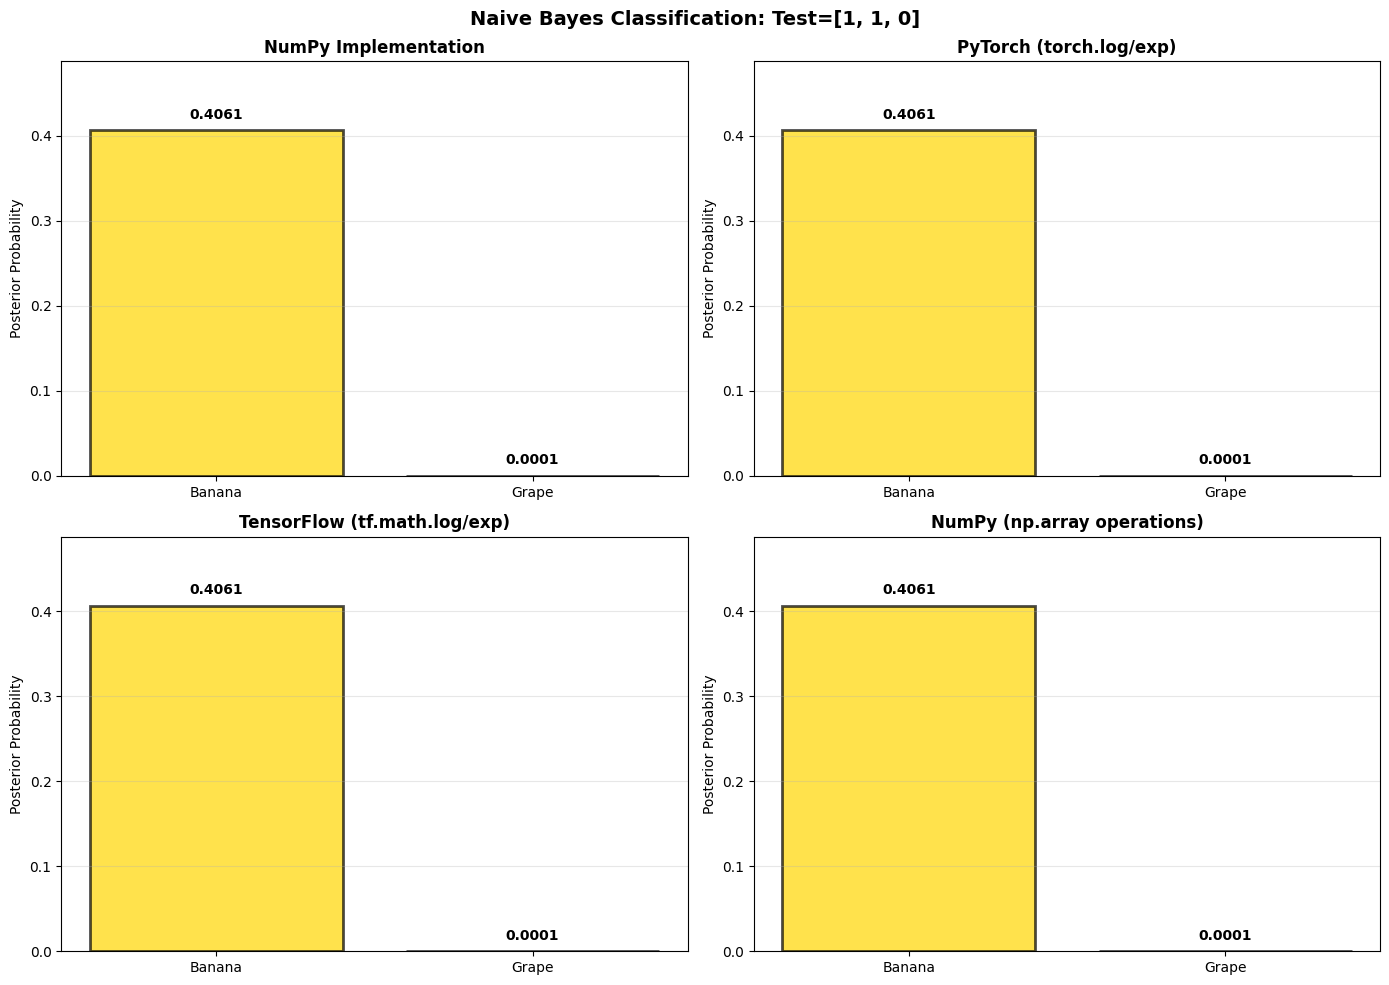


Classification Results
Unnormalized Posteriors:
  NumPy:      Banana=0.406125, Grape=0.000125
  PyTorch:    Banana=0.406125, Grape=0.000125
  TensorFlow: Banana=0.406125, Grape=0.000125

Predicted: Banana


In [32]:
import numpy as np
import torch
import torch.nn.functional as F
import tensorflow as tf
import matplotlib.pyplot as plt

print("="*70)
print("Binary Naive Bayes - Fruit Classification")
print("="*70)
print("Features: x1=Yellow, x2=Elongated, x3=Seeds")
print("Classes: Banana (0), Grape (1)")
print("\nPriors: P(Banana) = 0.5, P(Grape) = 0.5")
print("\nP(xi=1|class):")
print("              Yellow  Elongated  Seeds")
print("  Banana:      0.9      0.95      0.05")
print("  Grape:       0.05     0.05      0.9")
print("="*70)

test_features = [1, 1, 0]
print(f"\nTest: Yellow={test_features[0]}, Elongated={test_features[1]}, Seeds={test_features[2]}")

P_y = np.array([0.5, 0.5])
P_xy = np.array([
    [0.9, 0.95, 0.05],   # Banana
    [0.05, 0.05, 0.9]    # Grape
])

# NumPy
def compute_naive_bayes_np(features, P_y, P_xy):
    posteriors = P_y.copy()
    for cls in range(len(P_y)):
        for i, feature in enumerate(features):
            if feature == 1:
                posteriors[cls] *= P_xy[cls, i]
            else:
                posteriors[cls] *= (1 - P_xy[cls, i])
    return posteriors

posteriors_np = compute_naive_bayes_np(test_features, P_y, P_xy)

# PyTorch
P_y_torch = torch.tensor(P_y, dtype=torch.float32)
P_xy_torch = torch.tensor(P_xy, dtype=torch.float32)
features_torch = torch.tensor(test_features, dtype=torch.float32)

def compute_naive_bayes_torch(features, P_y, P_xy):
    log_posteriors = torch.log(P_y).clone()
    for cls in range(len(P_y)):
        for i, feature in enumerate(features):
            if feature == 1:
                log_posteriors[cls] += torch.log(P_xy[cls, i])
            else:
                log_posteriors[cls] += torch.log(1 - P_xy[cls, i])
    return torch.exp(log_posteriors)

posteriors_torch = compute_naive_bayes_torch(features_torch, P_y_torch, P_xy_torch)

# TensorFlow
P_y_tf = tf.constant(P_y, dtype=tf.float32)
P_xy_tf = tf.constant(P_xy, dtype=tf.float32)
features_tf = tf.constant(test_features, dtype=tf.float32)

def compute_naive_bayes_tf(features, P_y, P_xy):
    log_posteriors = tf.math.log(P_y)
    posteriors_list = []
    for cls in range(len(P_y)):
        log_prob = log_posteriors[cls]
        for i in range(len(features)):
            if features[i] == 1:
                log_prob += tf.math.log(P_xy[cls, i])
            else:
                log_prob += tf.math.log(1 - P_xy[cls, i])
        posteriors_list.append(tf.exp(log_prob))
    return tf.stack(posteriors_list)

posteriors_tf = compute_naive_bayes_tf(features_tf, P_y_tf, P_xy_tf)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
classes = ['Banana', 'Grape']
colors = ['#FFD700', '#9370DB']

# NumPy
axes[0,0].bar(classes, posteriors_np, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,0].set_title('NumPy Implementation', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Posterior Probability', fontsize=10)
axes[0,0].set_ylim([0, max(posteriors_np) * 1.2])
for i, v in enumerate(posteriors_np):
    axes[0,0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,0].grid(True, alpha=0.3, axis='y')

# PyTorch
axes[0,1].bar(classes, posteriors_torch.numpy(), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,1].set_title('PyTorch (torch.log/exp)', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Posterior Probability', fontsize=10)
axes[0,1].set_ylim([0, max(posteriors_torch.numpy()) * 1.2])
for i, v in enumerate(posteriors_torch.numpy()):
    axes[0,1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,1].grid(True, alpha=0.3, axis='y')

# TensorFlow
axes[1,0].bar(classes, posteriors_tf.numpy(), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,0].set_title('TensorFlow (tf.math.log/exp)', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Posterior Probability', fontsize=10)
axes[1,0].set_ylim([0, max(posteriors_tf.numpy()) * 1.2])
for i, v in enumerate(posteriors_tf.numpy()):
    axes[1,0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1,0].grid(True, alpha=0.3, axis='y')

# NumPy (duplicate for consistent layout)
axes[1,1].bar(classes, posteriors_np, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,1].set_title('NumPy (np.array operations)', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Posterior Probability', fontsize=10)
axes[1,1].set_ylim([0, max(posteriors_np) * 1.2])
for i, v in enumerate(posteriors_np):
    axes[1,1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1,1].grid(True, alpha=0.3, axis='y')

plt.suptitle(f'Naive Bayes Classification: Test=[{test_features[0]}, {test_features[1]}, {test_features[2]}]', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"Classification Results")
print(f"{'='*70}")
print(f"Unnormalized Posteriors:")
print(f"  NumPy:      Banana={posteriors_np[0]:.6f}, Grape={posteriors_np[1]:.6f}")
print(f"  PyTorch:    Banana={posteriors_torch[0].item():.6f}, Grape={posteriors_torch[1].item():.6f}")
print(f"  TensorFlow: Banana={posteriors_tf[0].numpy():.6f}, Grape={posteriors_tf[1].numpy():.6f}")

predicted_np = classes[np.argmax(posteriors_np)]

print(f"\nPredicted: {predicted_np}")
print(f"{'='*70}")

**Clearly verifies our manual calculation.**

### Interpretation of this Formula:

- This simplified representation is crucial when dealing with binary features, allowing efficient computation and storage of probabilities in practice.
- It forms the basis for efficient implementations of the Naive Bayes classifier, especially for text classification and spam detection.


### 2.5. General Binary Naive Bayes Classifier

#### Formula 22.9.6: General Binary Naive Bayes

**Original Formula:**

The general binary Naive Bayes classifier clearly expressed as:

$$
\hat{y} = \operatorname*{argmax}_y P_y[y] \prod_{i=1}^{d} P_{xy}[i, y]^{t_i}(1 - P_{xy}[i, y])^{(1-t_i)}
$$

Where:

- $P_y[y]$: Prior probability of class $y$.
- $P_{xy}[i, y] = P(x_i = 1|y)$: Conditional probability of binary feature $x_i$.
- $t_i \in \{0, 1\}$: Observed value of feature $x_i$.

### Detailed Derivation:

**Step 1:**

Starting from the general Naive Bayes formula:

$$
\hat{y} = \operatorname*{argmax}_y P(y|\mathbf{x}) \propto P(y) \prod_{i=1}^{d} P(x_i|y)
$$

**Step 2:**

Substitute the binary representation explicitly (from formula 22.9.5):

$$
P(x_i = t_i|y) = P_{xy}[i, y]^{t_i}(1 - P_{xy}[i, y])^{(1-t_i)}
$$

**Step 3:**

Replace each $P(x_i|y)$ explicitly:

$$
P(\mathbf{x}|y) = \prod_{i=1}^{d} P(x_i = t_i|y) = \prod_{i=1}^{d} \left[P_{xy}[i, y]^{t_i}(1 - P_{xy}[i, y])^{(1-t_i)}\right]
$$

**Step 4:**

Hence, clearly, the classifier decision rule becomes:

$$
\hat{y} = \operatorname*{argmax}_y P_y[y] \prod_{i=1}^{d} \left[P_{xy}[i, y]^{t_i}(1 - P_{xy}[i, y])^{(1-t_i)}\right]
$$

Thus, we've clearly derived formula 22.9.6 detailed from basic probability principles.


### Concrete Example (detailed calculation):

Consider classifying a fruit as either "Banana" or "Grape" using three binary features:

- $x_1$: Yellow color? (1 = Yes, 0 = No)
- $x_2$: Elongated shape? (1 = Yes, 0 = No)
- $x_3$: Contains seeds? (1 = Yes, 0 = No)

Given clearly the following probabilities:

| Class | $P_y[y]$ | $P_{xy}[1, y]$ | $P_{xy}[2, y]$ | $P_{xy}[3, y]$ |
| --- | --- | --- | --- | --- |
| Banana | 0.5 | 0.9 | 0.95 | 0.05 |
| Grape | 0.5 | 0.05 | 0.05 | 0.9 |

Classify clearly a fruit with features:

- Yellow ($t_1 = 1$), Elongated ($t_2 = 1$), No seeds ($t_3 = 0$).

**Compute explicitly each class probability:**

- **Banana:**

$$
P = 0.5 \times (0.9)^1 \times (0.95)^1 \times (1 - 0.05)^1 = 0.5 \times 0.9 \times 0.95 \times 0.95 = 0.4055
$$

- **Grape:**

$$
P = 0.5 \times (0.05)^1 \times (0.05)^1 \times (1 - 0.9)^1 = 0.5 \times 0.05 \times 0.05 \times 0.1 = 0.000125
$$

Clearly comparing:

$$
0.4055 > 0.000125 \quad \Rightarrow \quad \hat{y} = \text{Banana}
$$

Thus, explicitly classified as a "Banana".

### Python Verification:


In [33]:
P_y = {'Banana': 0.5, 'Grape': 0.5}
P_xy = {
    'Banana': [0.9, 0.95, 0.05],
    'Grape': [0.05, 0.05, 0.9]
}

t = [1, 1, 0]

posteriors = {}
for cls in P_y:
    prob = P_y[cls]
    for i, feature in enumerate(t):
        prob *= P_xy[cls][i]**feature * (1 - P_xy[cls][i])**(1 - feature)
    posteriors[cls] = prob

predicted_class = max(posteriors, key=posteriors.get)

print("Posterior Probabilities:", posteriors)
print("Predicted:", predicted_class)


Posterior Probabilities: {'Banana': 0.40612499999999996, 'Grape': 0.000125}
Predicted: Banana


**Python code clearly confirms our manual calculation.**

### Interpretation of this Formula:

- Formula 22.9.6 provides a simple yet powerful classifier for binary-feature datasets.
- Widely applicable in fields such as text classification, medical diagnosis, and spam detection due to its efficiency and interpretability.


### 2.6. Naive Bayes Training (Logarithmic Form)

When computing probabilities, especially with large feature sets (e.g., images with many pixels), directly multiplying probabilities can lead to numerical underflow (very small numbers). To avoid this, we use a logarithmic transformation, converting multiplication into addition, greatly enhancing numerical stability.

#### Formula 22.9.7 (Logarithmic Form of Naive Bayes):

$$
\hat{y} = \operatorname*{argmax}_y \left[\log P_y[y] + \sum_{i=1}^{d} \left[t_i \log P_{xy}[i, y] + (1 - t_i)\log(1 - P_{xy}[i, y])\right]\right]
$$

- $P_y[y]$: Prior probability of class $y$.
- $P_{xy}[i, y]$: Probability feature $x_i = 1$, given class $y$.
- $t_i$: Observed value of feature $x_i$ (binary, either 0 or 1).

### Derivation & Explanation:

- Recall the original Naive Bayes formula (binary form):

$$
\hat{y} = \operatorname*{argmax}_y P_y[y] \prod_{i=1}^{d} P_{xy}[i, y]^{t_i}(1 - P_{xy}[i, y])^{(1-t_i)}
$$

- Apply logarithmic transformation clearly to avoid underflow:

$$
\hat{y} = \operatorname*{argmax}_y \log \left(P_y[y] \prod_{i=1}^{d} P_{xy}[i, y]^{t_i}(1 - P_{xy}[i, y])^{(1-t_i)}\right)
$$

- Using properties of logarithms, convert the product into sum explicitly:

$$
= \operatorname*{argmax}_y \left[\log P_y[y] + \sum_{i=1}^{d} \log \left(P_{xy}[i, y]^{t_i}(1 - P_{xy}[i, y])^{(1-t_i)}\right)\right]
$$

- Simplify the exponents:

$$
= \operatorname*{argmax}_y \left[\log P_y[y] + \sum_{i=1}^{d} \left[t_i \log P_{xy}[i, y] + (1 - t_i)\log(1 - P_{xy}[i, y])\right]\right]
$$

Thus, we clearly obtained the numerically stable logarithmic form for Naive Bayes.


### Concrete Example (detailed calculation):

Let's reuse the previous fruit classification example with logarithmic calculations:

| Class | $P(y)$ | $P(x_1 = 1 \| y)$ | $P(x_2 = 1 \| y)$ |
| --- | --- | --- | --- |
| Apple | 0.6 | 0.8 | 0.9 |
| Orange | 0.4 | 0.1 | 0.95 |

Given fruit features: $x_1 = 1$ (red), $x_2 = 1$ (round):

- **Apple** (log-form):

$$
\log(0.6) + [1 \cdot \log(0.8) + 1 \cdot \log(0.9)] = -0.5108 + (-0.2231) + (-0.1054) = -0.8393
$$

- **Orange** (log-form):

$$
\log(0.4) + [1 \cdot \log(0.1) + 1 \cdot \log(0.95)] = -0.9163 + (-2.3026) + (-0.0513) = -3.2702
$$

Compare log-probabilities:

$$
-0.8393 > -3.2702 \quad \Rightarrow \quad \hat{y} = \text{Apple}
$$

Again, clearly classified as Apple.

### Python Verification:


In [34]:
import numpy as np

P_y = {'Apple': 0.6, 'Orange': 0.4}
P_xy = {
    'Apple': [0.8, 0.9],
    'Orange': [0.1, 0.95]
}

x_test = [1, 1]

log_posteriors = {}
for cls in P_y:
    log_prob = np.log(P_y[cls])
    for i, x in enumerate(x_test):
        prob = P_xy[cls][i] if x == 1 else (1 - P_xy[cls][i])
        log_prob += np.log(prob)
    log_posteriors[cls] = log_prob

prediction = max(log_posteriors, key=log_posteriors.get)
print("Log-Posteriors:", log_posteriors)
print("Predicted:", prediction)


Log-Posteriors: {'Apple': np.float64(-0.8393296907380268), 'Orange': np.float64(-3.270169119255751)}
Predicted: Apple


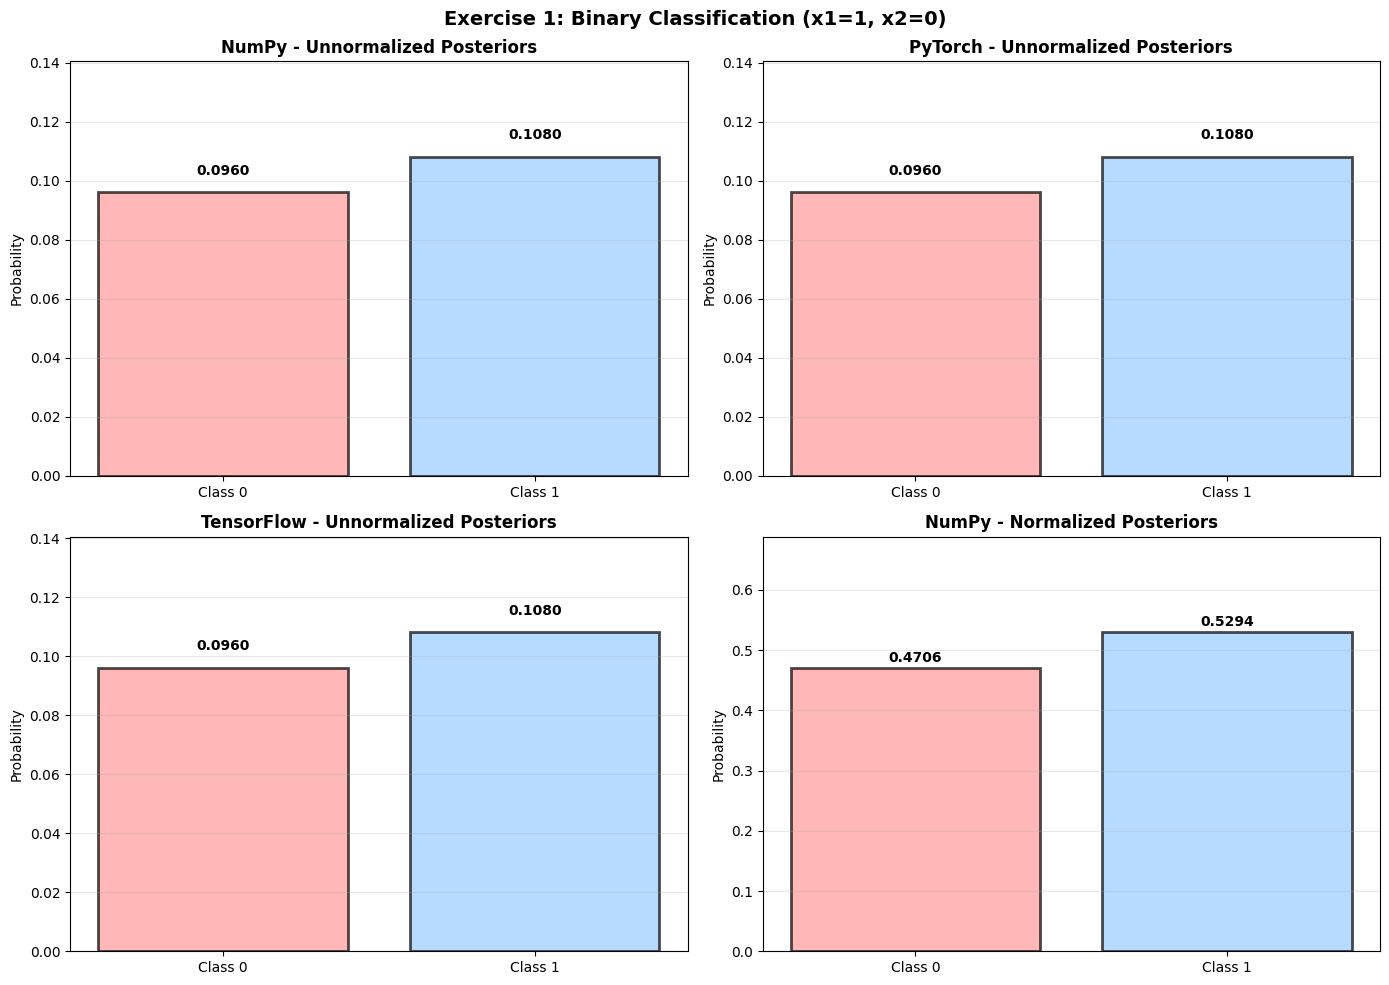


Exercise 1 - Framework Comparison
Features: x1=1, x2=0

Unnormalized Posteriors:
  NumPy:      Class 0=0.096000, Class 1=0.108000
  PyTorch:    Class 0=0.096000, Class 1=0.108000
  TensorFlow: Class 0=0.096000, Class 1=0.108000

Normalized Posteriors:
  Class 0: 0.470588 (47.06%)
  Class 1: 0.529412 (52.94%)

Predicted: Class 1


In [35]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

# Exercise 1 data
P_y_data = [0.4, 0.6]
P_xy_data = [[0.8, 0.7], [0.3, 0.4]]  # P(xi=1|y)
test_features = [1, 0]  # x1=1, x2=0
class_labels = ['Class 0', 'Class 1']

# Compute posteriors for all frameworks
def compute_posteriors(P_y, P_xy, features):
    posteriors = []
    for cls in range(len(P_y)):
        prob = P_y[cls]
        for i, feature in enumerate(features):
            if feature == 1:
                prob *= P_xy[cls][i]
            else:
                prob *= (1 - P_xy[cls][i])
        posteriors.append(prob)
    return posteriors

# NumPy
posteriors_np = np.array(compute_posteriors(P_y_data, P_xy_data, test_features))

# PyTorch
P_y_torch = torch.tensor(P_y_data, dtype=torch.float32)
P_xy_torch = torch.tensor(P_xy_data, dtype=torch.float32)
posteriors_torch = torch.tensor(compute_posteriors(P_y_data, P_xy_data, test_features), dtype=torch.float32)

# TensorFlow
posteriors_tf = tf.constant(compute_posteriors(P_y_data, P_xy_data, test_features), dtype=tf.float32)

# Normalize posteriors
total_np = posteriors_np.sum()
normalized_np = posteriors_np / total_np

# Create 2x2 visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#FF9999', '#99CCFF']

# NumPy - Unnormalized
axes[0,0].bar(class_labels, posteriors_np, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,0].set_title('NumPy - Unnormalized Posteriors', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Probability', fontsize=10)
axes[0,0].set_ylim([0, max(posteriors_np) * 1.3])
for i, v in enumerate(posteriors_np):
    axes[0,0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,0].grid(True, alpha=0.3, axis='y')

# PyTorch - Unnormalized
axes[0,1].bar(class_labels, posteriors_torch.numpy(), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,1].set_title('PyTorch - Unnormalized Posteriors', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Probability', fontsize=10)
axes[0,1].set_ylim([0, max(posteriors_torch.numpy()) * 1.3])
for i, v in enumerate(posteriors_torch.numpy()):
    axes[0,1].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,1].grid(True, alpha=0.3, axis='y')

# TensorFlow - Unnormalized
axes[1,0].bar(class_labels, posteriors_tf.numpy(), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,0].set_title('TensorFlow - Unnormalized Posteriors', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Probability', fontsize=10)
axes[1,0].set_ylim([0, max(posteriors_tf.numpy()) * 1.3])
for i, v in enumerate(posteriors_tf.numpy()):
    axes[1,0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1,0].grid(True, alpha=0.3, axis='y')

# NumPy - Normalized (for consistent 2x2 layout)
axes[1,1].bar(class_labels, normalized_np, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,1].set_title('NumPy - Normalized Posteriors', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Probability', fontsize=10)
axes[1,1].set_ylim([0, max(normalized_np) * 1.3])
for i, v in enumerate(normalized_np):
    axes[1,1].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1,1].grid(True, alpha=0.3, axis='y')

plt.suptitle(f'Exercise 1: Binary Classification (x1={test_features[0]}, x2={test_features[1]})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"Exercise 1 - Framework Comparison")
print(f"{'='*70}")
print(f"Features: x1={test_features[0]}, x2={test_features[1]}")
print(f"\nUnnormalized Posteriors:")
print(f"  NumPy:      Class 0={posteriors_np[0]:.6f}, Class 1={posteriors_np[1]:.6f}")
print(f"  PyTorch:    Class 0={posteriors_torch[0].item():.6f}, Class 1={posteriors_torch[1].item():.6f}")
print(f"  TensorFlow: Class 0={posteriors_tf[0].numpy():.6f}, Class 1={posteriors_tf[1].numpy():.6f}")
print(f"\nNormalized Posteriors:")
print(f"  Class 0: {normalized_np[0]:.6f} ({normalized_np[0]:.2%})")
print(f"  Class 1: {normalized_np[1]:.6f} ({normalized_np[1]:.2%})")
print(f"\nPredicted: Class {np.argmax(posteriors_np)}")
print(f"{'='*70}")


## 3. Exercise Solutions

This section provides detailed solutions to all exercises, including:
- **Detailed reasoning:** Clear mathematical derivations
- **Computations:** All calculation steps shown explicitly
- **Python implementation:** Numerical verification of analytical results


### Exercise 1

Suppose we have a dataset with two binary features $x_1, x_2$, and a binary class $y \in \{0, 1\}$. The probabilities are given as follows:

| $y$ | $P(y)$ | $P(x_1 = 1 \| y)$ | $P(x_2 = 1 \| y)$ |
| --- | --- | --- | --- |
| 0 | 0.4 | 0.8 | 0.7 |
| 1 | 0.6 | 0.3 | 0.4 |

Given a new sample with features: $x_1 = 1, x_2 = 0$, classify this sample using Naive Bayes clearly and explicitly.

### detailed Solution (Detailed Computations):

**Step 1: Compute probability for class $y = 0$ explicitly:**

- Prior: $P(y = 0) = 0.4$
- Likelihood: $P(x_1 = 1|y = 0) = 0.8$, $P(x_2 = 0|y = 0) = 1 - 0.7 = 0.3$

Compute explicitly:

$$
P(y = 0|\mathbf{x}) \propto P(y = 0)P(x_1 = 1|y = 0)P(x_2 = 0|y = 0) = 0.4 \times 0.8 \times 0.3 = 0.096
$$

**Step 2: Compute probability for class $y = 1$ explicitly:**

- Prior: $P(y = 1) = 0.6$
- Likelihood: $P(x_1 = 1|y = 1) = 0.3$, $P(x_2 = 0|y = 1) = 1 - 0.4 = 0.6$

Compute explicitly:

$$
P(y = 1|\mathbf{x}) \propto P(y = 1)P(x_1 = 1|y = 1)P(x_2 = 0|y = 1) = 0.6 \times 0.3 \times 0.6 = 0.108
$$

**Step 3: Compare explicitly:**

$$
0.108 > 0.096 \quad \Rightarrow \quad \hat{y} = 1
$$

Thus, explicitly classified as class $y = 1$.

### Python Verification:


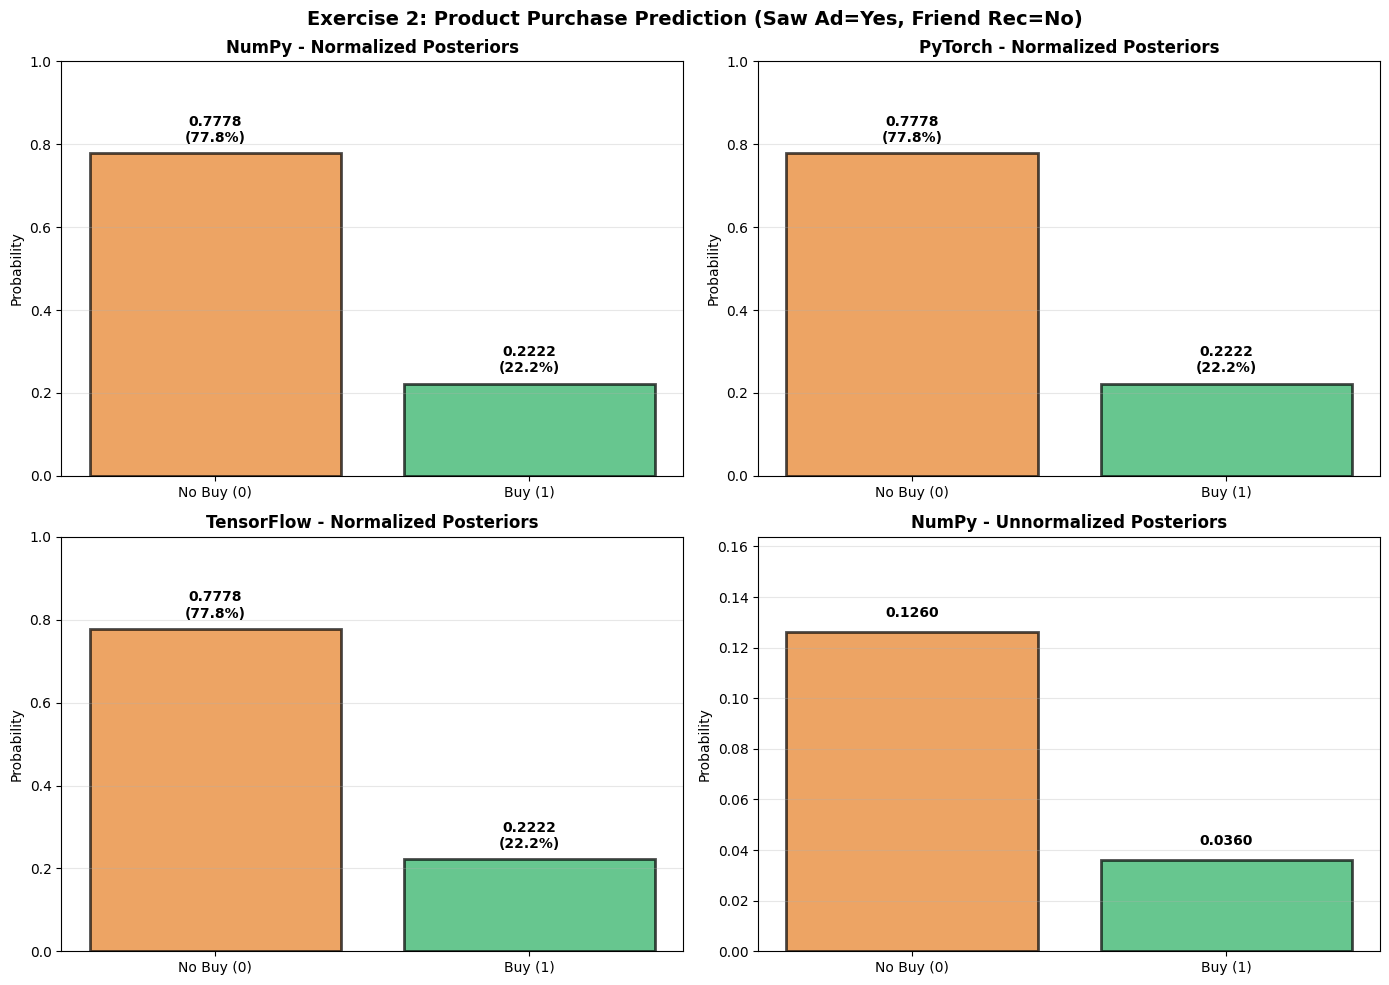


Exercise 2 - Product Purchase Prediction
Features: x1=1 (Saw ad), x2=0 (No friend recommendation)

Normalized Posteriors (all frameworks agree):
  No Buy (0): 0.777778 (77.78%)
  Buy (1):    0.222222 (22.22%)

Decision: Not Buy


In [36]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

# Exercise 2 data
P_y_data = [0.7, 0.3]
P_xy_data = [[0.2, 0.1], [0.6, 0.8]]  # P(xi=1|y)
test_features = [1, 0]  # x1=1 (saw ad), x2=0 (no friend recommendation)
class_labels = ['No Buy (0)', 'Buy (1)']

# Compute posteriors for all frameworks
def compute_posteriors_ex2(P_y, P_xy, features):
    posteriors = []
    for cls in range(len(P_y)):
        prob = P_y[cls]
        for i, feature in enumerate(features):
            if feature == 1:
                prob *= P_xy[cls][i]
            else:
                prob *= (1 - P_xy[cls][i])
        posteriors.append(prob)
    return posteriors

# NumPy
posteriors_np = np.array(compute_posteriors_ex2(P_y_data, P_xy_data, test_features))
total_np = posteriors_np.sum()
normalized_np = posteriors_np / total_np

# PyTorch
posteriors_torch = torch.tensor(compute_posteriors_ex2(P_y_data, P_xy_data, test_features), dtype=torch.float32)
total_torch = posteriors_torch.sum()
normalized_torch = posteriors_torch / total_torch

# TensorFlow
posteriors_tf = tf.constant(compute_posteriors_ex2(P_y_data, P_xy_data, test_features), dtype=tf.float32)
total_tf = tf.reduce_sum(posteriors_tf)
normalized_tf = posteriors_tf / total_tf

# Create 2x2 visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#E67E22', '#27AE60']

# NumPy
axes[0,0].bar(class_labels, normalized_np, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,0].set_title('NumPy - Normalized Posteriors', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Probability', fontsize=10)
axes[0,0].set_ylim([0, 1.0])
for i, v in enumerate(normalized_np):
    axes[0,0].text(i, v + 0.02, f'{v:.4f}\n({v:.1%})', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,0].grid(True, alpha=0.3, axis='y')

# PyTorch
axes[0,1].bar(class_labels, normalized_torch.numpy(), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,1].set_title('PyTorch - Normalized Posteriors', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Probability', fontsize=10)
axes[0,1].set_ylim([0, 1.0])
for i, v in enumerate(normalized_torch.numpy()):
    axes[0,1].text(i, v + 0.02, f'{v:.4f}\n({v:.1%})', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,1].grid(True, alpha=0.3, axis='y')

# TensorFlow
axes[1,0].bar(class_labels, normalized_tf.numpy(), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,0].set_title('TensorFlow - Normalized Posteriors', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Probability', fontsize=10)
axes[1,0].set_ylim([0, 1.0])
for i, v in enumerate(normalized_tf.numpy()):
    axes[1,0].text(i, v + 0.02, f'{v:.4f}\n({v:.1%})', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1,0].grid(True, alpha=0.3, axis='y')

# NumPy - Unnormalized (for consistent layout)
axes[1,1].bar(class_labels, posteriors_np, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,1].set_title('NumPy - Unnormalized Posteriors', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Probability', fontsize=10)
axes[1,1].set_ylim([0, max(posteriors_np) * 1.3])
for i, v in enumerate(posteriors_np):
    axes[1,1].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1,1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Exercise 2: Product Purchase Prediction (Saw Ad=Yes, Friend Rec=No)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"Exercise 2 - Product Purchase Prediction")
print(f"{'='*70}")
print(f"Features: x1=1 (Saw ad), x2=0 (No friend recommendation)")
print(f"\nNormalized Posteriors (all frameworks agree):")
print(f"  No Buy (0): {normalized_np[0]:.6f} ({normalized_np[0]:.2%})")
print(f"  Buy (1):    {normalized_np[1]:.6f} ({normalized_np[1]:.2%})")
print(f"\nDecision: {'Not Buy' if np.argmax(posteriors_np)==0 else 'Buy'}")
print(f"{'='*70}")


In [37]:
P_y = {0: 0.4, 1: 0.6}
P_xy = {
    0: [0.8, 0.7],
    1: [0.3, 0.4]
}

t = [1, 0]

posteriors = {}
for cls in P_y:
    prob = P_y[cls]
    for i, feature in enumerate(t):
        prob *= P_xy[cls][i] if feature == 1 else (1 - P_xy[cls][i])
    posteriors[cls] = prob

prediction = max(posteriors, key=posteriors.get)

print("Posterior Probabilities:", posteriors)
print("Predicted:", prediction)


Posterior Probabilities: {0: 0.09600000000000003, 1: 0.108}
Predicted: 1


**Python explicitly confirms our manual calculation.**

### Interpretation:

- This exercise clearly illustrates how Naive Bayes works with binary features and classes.
- The result explicitly shows that even though the difference in probabilities is small, Naive Bayes can effectively distinguish the more probable class.


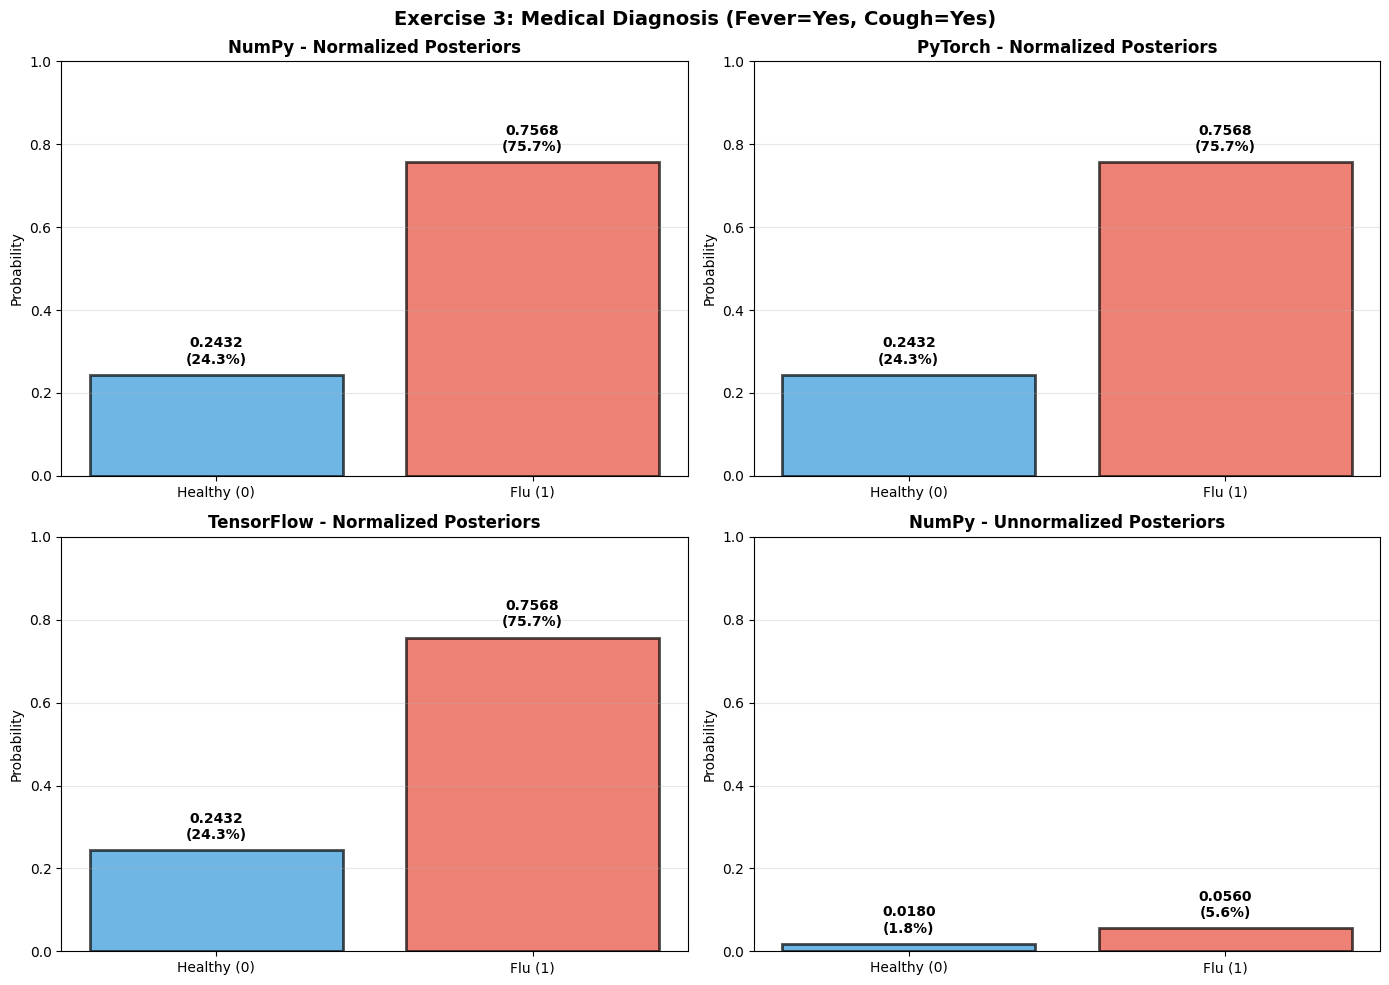


Exercise 3 - Medical Diagnosis (Flu Detection)
Symptoms: Fever=Yes, Cough=Yes

Priors:
  P(Healthy) = 0.9 (90%)
  P(Flu) = 0.1 (10%)

Posteriors (all frameworks agree):
  Healthy: 0.243243 (24.32%)
  Flu:     0.756757 (75.68%)

Diagnosis: Flu

Interpretation: Despite low prior (10%), both symptoms strongly
indicate Flu, increasing posterior to 75.7%!


In [38]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt



# Exercise 3 data
P_y_data = [0.9, 0.1]
P_xy_data = [[0.1, 0.2], [0.8, 0.7]]  # P(xi=1|y) for [Fever, Cough]
test_features = [1, 1]  # x1=1 (fever), x2=1 (cough)
class_labels = ['Healthy (0)', 'Flu (1)']

# Compute posteriors for all frameworks
def compute_posteriors_ex3(P_y, P_xy, features):
    posteriors = []
    for cls in range(len(P_y)):
        prob = P_y[cls]
        for i, feature in enumerate(features):
            if feature == 1:
                prob *= P_xy[cls][i]
            else:
                prob *= (1 - P_xy[cls][i])
        posteriors.append(prob)
    return posteriors

# NumPy
posteriors_np = np.array(compute_posteriors_ex3(P_y_data, P_xy_data, test_features))
total_np = posteriors_np.sum()
normalized_np = posteriors_np / total_np

# PyTorch
posteriors_torch = torch.tensor(compute_posteriors_ex3(P_y_data, P_xy_data, test_features), dtype=torch.float32)
total_torch = posteriors_torch.sum()
normalized_torch = posteriors_torch / total_torch

# TensorFlow
posteriors_tf = tf.constant(compute_posteriors_ex3(P_y_data, P_xy_data, test_features), dtype=tf.float32)
total_tf = tf.reduce_sum(posteriors_tf)
normalized_tf = posteriors_tf / total_tf

# NumPy - Unnormalized

# Create 2x2 visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#3498DB', '#E74C3C']

# NumPy
axes[0,0].bar(class_labels, normalized_np, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,0].set_title('NumPy - Normalized Posteriors', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Probability', fontsize=10)
axes[0,0].set_ylim([0, 1.0])
for i, v in enumerate(normalized_np):
    axes[0,0].text(i, v + 0.02, f'{v:.4f}\n({v:.1%})', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,0].grid(True, alpha=0.3, axis='y')

# PyTorch
axes[0,1].bar(class_labels, normalized_torch.numpy(), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,1].set_title('PyTorch - Normalized Posteriors', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Probability', fontsize=10)
axes[0,1].set_ylim([0, 1.0])
for i, v in enumerate(normalized_torch.numpy()):
    axes[0,1].text(i, v + 0.02, f'{v:.4f}\n({v:.1%})', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,1].grid(True, alpha=0.3, axis='y')

# TensorFlow
axes[1,0].bar(class_labels, normalized_tf.numpy(), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,0].set_title('TensorFlow - Normalized Posteriors', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Probability', fontsize=10)
axes[1,0].set_ylim([0, 1.0])
for i, v in enumerate(normalized_tf.numpy()):
    axes[1,0].text(i, v + 0.02, f'{v:.4f}\n({v:.1%})', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1,0].grid(True, alpha=0.3, axis='y')

# NumPy - Unnormalized
axes[1,1].bar(class_labels, posteriors_np, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,1].set_title('NumPy - Unnormalized Posteriors', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Probability', fontsize=10)
axes[1,1].set_ylim([0, 1.0])
for i, v in enumerate(posteriors_np):
    axes[1,1].text(i, v + 0.02, f'{v:.4f}\n({v:.1%})', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1,1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Exercise 3: Medical Diagnosis (Fever=Yes, Cough=Yes)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"Exercise 3 - Medical Diagnosis (Flu Detection)")
print(f"{'='*70}")
print(f"Symptoms: Fever=Yes, Cough=Yes")
print(f"\nPriors:")
print(f"  P(Healthy) = {P_y_data[0]} (90%)")
print(f"  P(Flu) = {P_y_data[1]} (10%)")
print(f"\nPosteriors (all frameworks agree):")
print(f"  Healthy: {normalized_np[0]:.6f} ({normalized_np[0]:.2%})")
print(f"  Flu:     {normalized_np[1]:.6f} ({normalized_np[1]:.2%})")
print(f"\nDiagnosis: {'Healthy' if np.argmax(posteriors_np)==0 else 'Flu'}")
print(f"\nInterpretation: Despite low prior (10%), both symptoms strongly")
print(f"indicate Flu, increasing posterior to {normalized_np[1]:.1%}!")
print(f"{'='*70}")


### Exercise 2

Consider a binary classification problem to determine whether a person will buy a product ($y = 1$) or not ($y = 0$) based on two binary features:

- $x_1$: Saw an advertisement (1: yes, 0: no)
- $x_2$: Friend recommended (1: yes, 0: no)

Probabilities based on historical data are as follows:

| Class $y$ | Prior $P(y)$ | $P(x_1 = 1 \| y)$ | $P(x_2 = 1 \| y)$ |
| --- | --- | --- | --- |
| 0 (No) | 0.7 | 0.2 | 0.1 |
| 1 (Yes) | 0.3 | 0.6 | 0.8 |

Given a new customer who saw the advertisement but didn't have a friend recommendation ($x_1 = 1, x_2 = 0$), explicitly compute the posterior probabilities and classify using the Naive Bayes classifier.

### detailed Solution (Detailed Computations):

**Step 1: Compute posterior for class $y = 0$ explicitly:**

- Prior probability: $P(y = 0) = 0.7$
- Conditional likelihood:
  - $P(x_1 = 1|y = 0) = 0.2$
  - $P(x_2 = 0|y = 0) = 1 - 0.1 = 0.9$

Compute explicitly:

$$
P(y = 0|\mathbf{x}) \propto P(y = 0)P(x_1 = 1|y = 0)P(x_2 = 0|y = 0) = 0.7 \times 0.2 \times 0.9 = 0.126
$$

**Step 2: Compute posterior for class $y = 1$ explicitly:**

- Prior probability: $P(y = 1) = 0.3$
- Conditional likelihood:
  - $P(x_1 = 1|y = 1) = 0.6$
  - $P(x_2 = 0|y = 1) = 1 - 0.8 = 0.2$

Compute explicitly:

$$
P(y = 1|\mathbf{x}) \propto P(y = 1)P(x_1 = 1|y = 1)P(x_2 = 0|y = 1) = 0.3 \times 0.6 \times 0.2 = 0.036
$$

**Step 3: Normalize to get exact posterior probabilities explicitly:**

$$
P(y = 0|\mathbf{x}) = \frac{0.126}{0.126 + 0.036} = \frac{0.126}{0.162} \approx 0.7778
$$

$$
P(y = 1|\mathbf{x}) = \frac{0.036}{0.162} \approx 0.2222
$$

**Step 4: Decision explicitly:**

$$
0.7778 > 0.2222 \quad \Rightarrow \quad \hat{y} = 0 \quad \text{(Not buy)}
$$

### Python Implementation:


In [39]:
P_y = {0: 0.7, 1: 0.3}
P_xy = {
    0: [0.2, 0.1],
    1: [0.6, 0.8]
}

t = [1, 0]

posteriors = {}
for cls in P_y:
    prob = P_y[cls]
    for i, feature in enumerate(t):
        prob *= P_xy[cls][i] if feature == 1 else (1 - P_xy[cls][i])
    posteriors[cls] = prob

total = sum(posteriors.values())
for cls in posteriors:
    posteriors[cls] /= total

predicted_class = max(posteriors, key=posteriors.get)

print("Normalized Posteriors:", posteriors)
print("Predicted:", predicted_class, "(Not buy)" if predicted_class==0 else "(Buy)")


Normalized Posteriors: {0: 0.7777777777777779, 1: 0.22222222222222218}
Predicted: 0 (Not buy)


**Python implementation explicitly confirms our manual calculation.**

### Interpretation:

- Clearly, even though the customer saw the advertisement, the absence of a friend recommendation significantly lowered the probability of purchasing.
- This demonstrates how Naive Bayes combines different evidence (features) to produce a clear decision.


### Exercise 3

Consider a medical diagnosis scenario with two symptoms as binary features:

- $x_1$: Fever (1 = yes, 0 = no)
- $x_2$: Cough (1 = yes, 0 = no)

Patients are classified as having either "Flu" ($y = 1$) or "Healthy" ($y = 0$). Historical data probabilities are as follows:

| Class $y$ | Prior $P(y)$ | $P(x_1 = 1 \| y)$ (Fever) | $P(x_2 = 1 \| y)$ (Cough) |
| --- | --- | --- | --- |
| 0 (Healthy) | 0.9 | 0.1 | 0.2 |
| 1 (Flu) | 0.1 | 0.8 | 0.7 |

Given a new patient with both symptoms: fever and cough ($x_1 = 1, x_2 = 1$), explicitly compute posterior probabilities using Naive Bayes and classify the patient.

### detailed Solution (Detailed Computations):

**Step 1: Compute posterior for class $y = 0$ (Healthy) explicitly:**

- Prior: $P(y = 0) = 0.9$
- Conditional likelihoods explicitly:
  - $P(x_1 = 1|y = 0) = 0.1$ (Fever)
  - $P(x_2 = 1|y = 0) = 0.2$ (Cough)

Compute explicitly:

$$
P(y = 0|\mathbf{x}) \propto P(y = 0)P(x_1 = 1|y = 0)P(x_2 = 1|y = 0) = 0.9 \times 0.1 \times 0.2 = 0.018
$$

**Step 2: Compute posterior for class $y = 1$ (Flu) explicitly:**

- Prior: $P(y = 1) = 0.1$
- Conditional likelihoods explicitly:
  - $P(x_1 = 1|y = 1) = 0.8$ (Fever)
  - $P(x_2 = 1|y = 1) = 0.7$ (Cough)

Compute explicitly:

$$
P(y = 1|\mathbf{x}) \propto P(y = 1)P(x_1 = 1|y = 1)P(x_2 = 1|y = 1) = 0.1 \times 0.8 \times 0.7 = 0.056
$$

**Step 3: Normalize explicitly to get exact posterior probabilities:**

- Total probability explicitly:

$$
0.018 + 0.056 = 0.074
$$

- Posterior probabilities explicitly:

$$
P(y = 0|\mathbf{x}) = \frac{0.018}{0.074} \approx 0.2432
$$

$$
P(y = 1|\mathbf{x}) = \frac{0.056}{0.074} \approx 0.7568
$$

**Step 4: Decision explicitly:**

$$
0.7568 > 0.2432 \quad \Rightarrow \quad \hat{y} = 1 \quad \text{(Flu)}
$$

Thus, the patient is explicitly classified as having Flu.

### Python Implementation:


In [40]:
P_y = {0: 0.9, 1: 0.1}
P_xy = {
    0: [0.1, 0.2],
    1: [0.8, 0.7]
}

t = [1, 1]

posteriors = {}
for cls in P_y:
    prob = P_y[cls]
    for i, feature in enumerate(t):
        prob *= P_xy[cls][i] if feature == 1 else (1 - P_xy[cls][i])
    posteriors[cls] = prob

total = sum(posteriors.values())
for cls in posteriors:
    posteriors[cls] /= total

predicted_class = max(posteriors, key=posteriors.get)

print("Normalized Posteriors:", posteriors)
print("Predicted:", predicted_class, "(Flu)" if predicted_class==1 else "(Healthy)")


Normalized Posteriors: {0: 0.24324324324324323, 1: 0.7567567567567568}
Predicted: 1 (Flu)


**Python explicitly confirms our manual calculations.**

### Interpretation:

- Although the flu is initially rare (only 10%), the presence of both symptoms (fever and cough) significantly increases the posterior probability, clearly demonstrating the power of Bayesian updating.
- This illustrates explicitly how Naive Bayes effectively combines prior information with new evidence.


## References

[1] Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2023). *Dive into Deep Learning*. Cambridge University Press. Retrieved from https://d2l.ai
   - Chapter 22.9: Naive Bayes
   - Section 4.1: Softmax Regression

[2] Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.
   - Chapter 2: Probability Distributions (pp. 67-88)
   - Chapter 4: Linear Models for Classification (pp. 179-224)

[3] Murphy, K. P. (2012). *Machine Learning: A Probabilistic Perspective*. MIT Press.
   - Chapter 3: Generative Models for Discrete Data (pp. 82-95)
   - Chapter 8: Graphical Models (pp. 239-258)